In [1]:
import numpy as np

import random

def getD(G): 
    V = G.vertices()
    D = [None] + [(v,w,i) for v in V for w in G.neighbors(v) for i in [0,1]]
    return D

def twisted_faces2(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
            print(Rlist)
    R = Permutation(Rlist)
    print("R = ", R)
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))
        print(Llist)

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)
    print("L = ", L)
    print("twisted_faces = ", R*L)    
    return R*L #, R, L, D

def sample_number_of_twisted_faces(G,samples=10,do_twist=True):
    return [len(twisted_faces2(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

def equal(e,f):
    return set(e[0:2])==set(f[0:2])


def count_bad(G,do_twist=True):
    D = getD(G)
    F = twisted_faces2(G,do_twist=do_twist)
    bad = 0
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        
    return bad/2
    
def sample_number_of_bad_edges(G,do_twist=True,samples=100):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad(G,do_twist=do_twist))
    return L


def number_of_CDC(G,do_twist=True,samples=10):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad(G,do_twist=do_twist))
    return CDC


def check_tw_faces(G):
    F,R,L,D = twisted_faces2(G)
    print(list(zip(D,range(100))))
    C = F.cycle_tuples()
    m = G.num_edges()
    assert(len(D) == 4*m+1)
    U = reduce(lambda x,y: x.union(y), [set(x) for x in C], set([]))
    assert(len(U) == 4*m)
    print(R.cycle_tuples())
    for vert in R.cycle_tuples():
        for x in vert:
            print(D[x])
        print('--')
    print('\n ===== \n')

    print(L.cycle_tuples())
    for edge in L.cycle_tuples():
        for x in edge:
            print(D[x])
        print('--')            

    print('\n ===== \n')
    print(F.cycle_tuples())
    for face in C:
        for d in face:
            print(D[d])

def twisted_faces3(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
    R = Permutation(Rlist)
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)  
    return R*L #, R, L, D






def sample_number_of_twisted_faces3(G,samples=10,do_twist=True):
    return [len(twisted_faces3(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

def equal(e,f):
    return set(e[0:2])==set(f[0:2])


def count_bad3(G,do_twist=True):
    D = getD(G)
    F = twisted_faces3(G,do_twist=do_twist)
    bad = 0
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        
    return bad/2
    
def sample_number_of_bad_edges3(G,do_twist=True,samples=100):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad3(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad3(G,do_twist=do_twist))
    return L


def number_of_CDC3(G,do_twist=True,samples=10):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad3(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad3(G,do_twist=do_twist))
    return CDC


def change_tuple(x,y):
    L = (x,y)
    L = list(L)
    L.reverse()
    return tuple(L)

In [2]:
pt = graphs.PetersenGraph()

In [3]:
number_of_CDC3(pt,do_twist=False,samples=10000)

380

In [4]:
number_of_CDC3(pt,do_twist=True,samples=10000)

18

In [5]:
G = graphs.CompleteBipartiteGraph(3,3)

In [6]:
number_of_CDC3(G,do_twist=False,samples=10000)

631

In [7]:
number_of_CDC3(G,do_twist=True,samples=10000)

171

In [8]:
G1 = graphs.CompleteGraph(4)

In [9]:
number_of_CDC3(G1,do_twist=False,samples=10000)

1222

In [10]:
number_of_CDC3(G1,do_twist=True,samples=10000)

322

In [11]:
B1 = graphs.BlanusaFirstSnarkGraph()

In [12]:
number_of_CDC3(B1,do_twist=False,samples=10000)

9

In [13]:
number_of_CDC3(B1,do_twist=True,samples=10000)

1

In [14]:
B2 = graphs.BlanusaFirstSnarkGraph()

In [15]:
number_of_CDC3(B2,do_twist=False,samples=10000)

14

In [16]:
number_of_CDC3(B2,do_twist=True,samples=10000)

1

In [2]:
def Faces(G,do_twist=True):
    D = getD(G)
    F = twisted_faces3(G,do_twist=do_twist)
    bad = 0
    L = []
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        E = edges    
        E.append(E[0])
        for i in range(1, (len(E)-1)):
            (x,y) = E[i+1]
            for j in range(2):
                if E[i][1] != E[i+1][0]:
                    E[i+1] = change_tuple(x,y)
        E.remove(E[0])
        L.append(E)
    return L

In [18]:
print(Faces(graphs.CompleteGraph(4),do_twist=True))

[[(0, 2), (2, 1), (1, 3), (3, 2), (2, 1), (1, 0)], [(0, 3), (3, 1), (1, 0)], [(0, 3), (3, 2), (2, 0)], [(0, 1), (1, 2), (2, 3), (3, 1), (1, 2), (2, 0)], [(0, 1), (1, 3), (3, 0)], [(0, 2), (2, 3), (3, 0)]]


In [19]:
print(Faces(graphs.PetersenGraph(),do_twist=True))

[[(0, 4), (4, 3), (3, 2), (2, 7), (7, 9), (9, 4), (4, 0), (0, 5), (5, 7), (7, 2), (2, 1), (1, 6), (6, 8), (8, 3), (3, 4), (4, 9), (9, 6), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6), (6, 1), (1, 0)], [(0, 5), (5, 8), (8, 3), (3, 2), (2, 1), (1, 0)], [(0, 1), (1, 6), (6, 9), (9, 7), (7, 5), (5, 8), (8, 6), (6, 9), (9, 4), (4, 3), (3, 8), (8, 6), (6, 1), (1, 2), (2, 7), (7, 5), (5, 0), (0, 4), (4, 9), (9, 7), (7, 2), (2, 3), (3, 4), (4, 0)], [(0, 1), (1, 2), (2, 3), (3, 8), (8, 5), (5, 0)]]


In [32]:
R2 = graphs.RandomRegular(3,100)

In [33]:
R2.is_edge_transitive()

False

In [34]:
number_of_CDC3(R2,do_twist=True,samples=10000)

0

In [35]:
number_of_CDC3(R2,do_twist=False,samples=10000)

0

In [36]:
R3 = graphs.RandomRegular(3,10)

In [37]:
number_of_CDC3(R3,do_twist=False,samples=10000)

18

In [38]:
number_of_CDC3(R3,do_twist=True,samples=10000)

2

In [39]:
R3.is_edge_transitive()

False

In [41]:
number_of_CDC3(R3,do_twist=True,samples=10000)

5

In [42]:
number_of_CDC3(R3,do_twist=False,samples=10000)

24

In [43]:
number_of_CDC3(R3,do_twist=True,samples=10000)

5

In [44]:
number_of_CDC3(R3,do_twist=False,samples=10000)

16

In [45]:
R4 = graphs.RandomRegular(3,6)

In [46]:
number_of_CDC3(R4,do_twist=True,samples=10000)

171

In [47]:
number_of_CDC3(R4,do_twist=False,samples=10000)

617

In [48]:
R4.is_edge_transitive()

True

In [58]:
R5 = graphs.RandomRegular(3,6)

In [59]:
R5.is_edge_transitive()

False

In [60]:
number_of_CDC3(R5,do_twist=True,samples=10000)

66

In [61]:
number_of_CDC3(R5,do_twist=False,samples=10000)

346

In [62]:
R6 = graphs.RandomRegular(3,20)

In [63]:
R6.is_edge_transitive()

False

In [64]:
number_of_CDC3(R6,do_twist=True,samples=10000)

0

In [65]:
number_of_CDC3(R6,do_twist=False,samples=10000)

4

In [66]:
number_of_CDC3(R6,do_twist=True,samples=10000)

0

In [67]:
number_of_CDC3(R6,do_twist=False,samples=10000)

1

In [77]:
print(Faces(graphs.CompleteGraph(4),do_twist=True))

[[(0, 3), (3, 2), (2, 0), (0, 3), (3, 1), (1, 2), (2, 3), (3, 1), (1, 0), (0, 2), (2, 1), (1, 0)], [(0, 1), (1, 3), (3, 2), (2, 1), (1, 3), (3, 0), (0, 2), (2, 3), (3, 0), (0, 1), (1, 2), (2, 0)]]


In [78]:
print(Faces(R4,do_twist=True))

[[(0, 2), (2, 4), (4, 1), (1, 3), (3, 5), (5, 0), (0, 1), (1, 4), (4, 5), (5, 0), (0, 2), (2, 3), (3, 5), (5, 4), (4, 2), (2, 3), (3, 1), (1, 0)], [(0, 5), (5, 3), (3, 1), (1, 4), (4, 2), (2, 0), (0, 1), (1, 3), (3, 2), (2, 4), (4, 5), (5, 3), (3, 2), (2, 0), (0, 5), (5, 4), (4, 1), (1, 0)]]


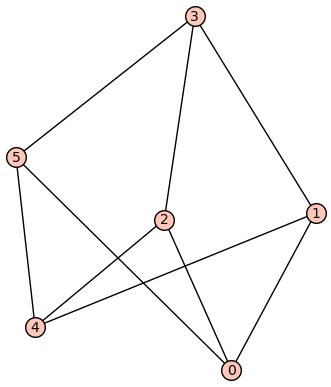

In [79]:
R4.show()

In [3]:
G = graphs.CompleteGraph(4)
do_twist=True
D = getD(G)
F = twisted_faces3(G,do_twist=do_twist)
bad = 0
L = []
for face in F.cycle_tuples():
    edges = [tuple(sorted(D[x][:2])) for x in face]
    bad += len(edges) - len(set(edges))
    E = edges    
    E.append(E[0])
    for i in range(1, (len(E)-1)):
        (x,y) = E[i+1]
        for j in range(2):
            if E[i][1] != E[i+1][0]:
                E[i+1] = change_tuple(x,y)
    E.remove(E[0])
    L.append(E)
print(L)

Bad_Neg = 0
List_Bad_Neg = []
for k in range (len(L)):
    print("L[k] = ", L[k])
    for i in range(len(L[k])):
        for j in range(i+1, len(L[k])):
            if L[k][i][0] == L[k][j][0]:
                if L[k][i][1] == L[k][j][1]:
                    print(L[k][i])
                    Bad_Neg += 1
    #List_Bad_Neg.append(L[i][j])
print(Bad_Neg/2)
#print(List_Bad_Neg)
print("-------------------------------------------------------------------------")
Bad_Pos = 0
List_Bad_Pos = []
for k in range (len(L)):
    print("L[k] = ", L[k])
    for i in range(len(L[k])):
        for j in range(i+1, len(L[k])):
            if L[k][i][0] == L[k][j][1]:
                if L[k][i][1] == L[k][j][0]:
                    print(L[k][i])
                    Bad_Pos += 1
print(Bad_Pos/2)

[[(0, 2), (2, 3), (3, 0), (0, 1), (1, 3), (3, 0), (0, 2), (2, 1), (1, 3), (3, 2), (2, 1), (1, 0)], [(0, 3), (3, 2), (2, 0), (0, 1), (1, 2), (2, 3), (3, 1), (1, 2), (2, 0), (0, 3), (3, 1), (1, 0)]]
L[k] =  [(0, 2), (2, 3), (3, 0), (0, 1), (1, 3), (3, 0), (0, 2), (2, 1), (1, 3), (3, 2), (2, 1), (1, 0)]
(0, 2)
(3, 0)
(1, 3)
(2, 1)
L[k] =  [(0, 3), (3, 2), (2, 0), (0, 1), (1, 2), (2, 3), (3, 1), (1, 2), (2, 0), (0, 3), (3, 1), (1, 0)]
(0, 3)
(2, 0)
(1, 2)
(3, 1)
4
-------------------------------------------------------------------------
L[k] =  [(0, 2), (2, 3), (3, 0), (0, 1), (1, 3), (3, 0), (0, 2), (2, 1), (1, 3), (3, 2), (2, 1), (1, 0)]
(2, 3)
(0, 1)
L[k] =  [(0, 3), (3, 2), (2, 0), (0, 1), (1, 2), (2, 3), (3, 1), (1, 2), (2, 0), (0, 3), (3, 1), (1, 0)]
(3, 2)
(0, 1)
2


In [108]:
count_bad3(G)

15

In [10]:
def Num_Bad_Pos_Neg(G ,do_twist=True):
    D = getD(G)
    F = twisted_faces3(G,do_twist=do_twist)
    bad = 0
    L = []
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        E = edges    
        E.append(E[0])
        for i in range(1, (len(E)-1)):
            (x,y) = E[i+1]
            for j in range(2):
                if E[i][1] != E[i+1][0]:
                    E[i+1] = change_tuple(x,y)
        E.remove(E[0])
        L.append(E)
    
    
    Bad_Neg = 0
    List_Bad_Neg = []
    for k in range (len(L)):
        print("L[k] = ", L[k])
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][0]:
                    if L[k][i][1] == L[k][j][1]:
                        Bad_Neg += 1
    
    print("Bad_Neg =", Bad_Neg/2)

    Bad_Pos = 0
    List_Bad_Pos = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][1]:
                    if L[k][i][1] == L[k][j][0]:
                        Bad_Pos += 1
    print("Bad_Pos =", Bad_Pos/2)
    return (Bad_Neg/2 , Bad_Pos/2)

In [11]:
G = graphs.CompleteGraph(4)

In [12]:
Num_Bad_Pos_Neg(G ,do_twist=True)

L[k] =  [(0, 3), (3, 1), (1, 2), (2, 3), (3, 1), (1, 0)]
L[k] =  [(0, 2), (2, 3), (3, 0), (0, 2), (2, 1), (1, 0)]
L[k] =  [(0, 1), (1, 2), (2, 0), (0, 3), (3, 2), (2, 0)]
L[k] =  [(0, 1), (1, 3), (3, 2), (2, 1), (1, 3), (3, 0)]
Bad_Neg = 2
Bad_Pos = 0


(2, 0)

In [157]:
pt = graphs.PetersenGraph()

In [158]:
Num_Bad_Pos_Neg(pt ,do_twist=True)

L[k] =  [(0, 5), (5, 8), (8, 3), (3, 4), (4, 0), (0, 1), (1, 6), (6, 9), (9, 7), (7, 5), (5, 0), (0, 4), (4, 9), (9, 7), (7, 2), (2, 3), (3, 8), (8, 6), (6, 1), (1, 2), (2, 7), (7, 5), (5, 8), (8, 6), (6, 9), (9, 4), (4, 3), (3, 2), (2, 1), (1, 0)]
L[k] =  [(0, 4), (4, 3), (3, 8), (8, 5), (5, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 9), (9, 6), (6, 8), (8, 5), (5, 7), (7, 2), (2, 1), (1, 6), (6, 8), (8, 3), (3, 2), (2, 7), (7, 9), (9, 4), (4, 0), (0, 5), (5, 7), (7, 9), (9, 6), (6, 1), (1, 0)]
Bad_Neg = 5
Bad_Pos = 10


(10, 5)

In [159]:
pt1 = graphs.PetersenGraph()

In [160]:
Num_Bad_Pos_Neg(pt1 ,do_twist=True)

L[k] =  [(0, 4), (4, 9), (9, 6), (6, 8), (8, 5), (5, 0), (0, 1), (1, 6), (6, 8), (8, 3), (3, 2), (2, 7), (7, 5), (5, 8), (8, 3), (3, 4), (4, 9), (9, 7), (7, 2), (2, 1), (1, 0)]
L[k] =  [(0, 5), (5, 8), (8, 6), (6, 9), (9, 4), (4, 0), (0, 1), (1, 2), (2, 7), (7, 9), (9, 4), (4, 3), (3, 8), (8, 5), (5, 7), (7, 2), (2, 3), (3, 8), (8, 6), (6, 1), (1, 0)]
L[k] =  [(0, 5), (5, 7), (7, 9), (9, 6), (6, 1), (1, 2), (2, 3), (3, 4), (4, 0)]
L[k] =  [(0, 4), (4, 3), (3, 2), (2, 1), (1, 6), (6, 9), (9, 7), (7, 5), (5, 0)]
Bad_Neg = 3
Bad_Pos = 3


(3, 3)

In [161]:
B1 = graphs.BlanusaFirstSnarkGraph()

In [162]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

L[k] =  [(0, 1), (1, 2), (2, 3), (3, 8), (8, 7), (7, 17), (17, 4), (4, 3), (3, 8), (8, 9), (9, 13), (13, 14), (14, 15), (15, 10), (10, 11), (11, 6), (6, 5), (5, 4), (4, 3), (3, 2), (2, 14), (14, 15), (15, 16), (16, 12), (12, 13), (13, 9), (9, 10), (10, 15), (15, 16), (16, 0), (0, 5), (5, 4), (4, 17), (17, 1), (1, 0), (0, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 2), (2, 1), (1, 17), (17, 7), (7, 6), (6, 11), (11, 12), (12, 16), (16, 0)]
L[k] =  [(0, 16), (16, 12), (12, 11), (11, 6), (6, 7), (7, 17), (17, 1), (1, 2), (2, 14), (14, 13), (13, 12), (12, 11), (11, 10), (10, 9), (9, 8), (8, 7), (7, 6), (6, 5), (5, 0), (0, 1), (1, 17), (17, 4), (4, 5), (5, 0), (0, 16), (16, 15), (15, 10), (10, 9), (9, 13), (13, 12), (12, 16), (16, 15), (15, 14), (14, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 11), (11, 10), (10, 15), (15, 14), (14, 13), (13, 9), (9, 8), (8, 3), (3, 4), (4, 17), (17, 7), (7, 8), (8, 3), (3, 2), (2, 1), (1, 0)]
Bad_Neg = 13
Bad_Pos =

(14, 13)

In [163]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

L[k] =  [(0, 5), (5, 4), (4, 17), (17, 1), (1, 0), (0, 5), (5, 6), (6, 7), (7, 17), (17, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 11), (11, 10), (10, 15), (15, 14), (14, 13), (13, 12), (12, 11), (11, 6), (6, 7), (7, 8), (8, 9), (9, 13), (13, 12), (12, 16), (16, 15), (15, 14), (14, 2), (2, 1), (1, 0), (0, 16), (16, 15), (15, 10), (10, 9), (9, 13), (13, 14), (14, 2), (2, 3), (3, 8), (8, 7), (7, 17), (17, 4), (4, 3), (3, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 16), (16, 0)]
L[k] =  [(0, 1), (1, 2), (2, 14), (14, 15), (15, 16), (16, 12), (12, 13), (13, 9), (9, 8), (8, 7), (7, 6), (6, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 10), (10, 11), (11, 6), (6, 5), (5, 4), (4, 3), (3, 2), (2, 1), (1, 17), (17, 7), (7, 6), (6, 5), (5, 0), (0, 1), (1, 17), (17, 4), (4, 5), (5, 0), (0, 16), (16, 12), (12, 11), (11, 10), (10, 9), (9, 8), (8, 3), (3, 4), (4, 17), (17, 7), (7, 8), (8, 3), (3, 2), (2, 14), (14, 13), (13, 9), (9, 10), (10, 15), (15, 16), (16, 0)]
Bad_Neg = 15
Bad_Pos =

(12, 15)

In [168]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

L[k] =  [(0, 1), (1, 2), (2, 3), (3, 8), (8, 7), (7, 17), (17, 4), (4, 5), (5, 6), (6, 7), (7, 17), (17, 1), (1, 0), (0, 5), (5, 6), (6, 11), (11, 10), (10, 9), (9, 13), (13, 14), (14, 2), (2, 3), (3, 4), (4, 17), (17, 1), (1, 2), (2, 14), (14, 15), (15, 10), (10, 11), (11, 12), (12, 16), (16, 0), (0, 5), (5, 4), (4, 3), (3, 8), (8, 9), (9, 13), (13, 12), (12, 16), (16, 15), (15, 14), (14, 13), (13, 12), (12, 11), (11, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 15), (15, 16), (16, 0)]
L[k] =  [(0, 16), (16, 15), (15, 10), (10, 9), (9, 8), (8, 7), (7, 6), (6, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 12), (12, 13), (13, 9), (9, 8), (8, 3), (3, 4), (4, 5), (5, 0), (0, 16), (16, 12), (12, 11), (11, 10), (10, 15), (15, 14), (14, 2), (2, 1), (1, 17), (17, 4), (4, 3), (3, 2), (2, 14), (14, 13), (13, 9), (9, 10), (10, 11), (11, 6), (6, 5), (5, 0), (0, 1), (1, 17), (17, 7), (7, 6), (6, 5), (5, 4), (4, 17), (17, 7), (7, 8), (8, 3), (3, 2), (2, 1), (1, 0)]
Bad_Neg = 13
Bad_Pos =

(14, 13)

In [169]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

L[k] =  [(0, 5), (5, 4), (4, 3), (3, 8), (8, 7), (7, 6), (6, 11), (11, 12), (12, 13), (13, 9), (9, 8), (8, 7), (7, 17), (17, 1), (1, 0), (0, 16), (16, 15), (15, 14), (14, 2), (2, 1), (1, 17), (17, 4), (4, 5), (5, 6), (6, 11), (11, 10), (10, 9), (9, 8), (8, 3), (3, 2), (2, 1), (1, 0), (0, 5), (5, 6), (6, 7), (7, 17), (17, 4), (4, 3), (3, 2), (2, 14), (14, 13), (13, 12), (12, 16), (16, 0)]
L[k] =  [(0, 1), (1, 17), (17, 7), (7, 8), (8, 9), (9, 13), (13, 12), (12, 11), (11, 6), (6, 7), (7, 8), (8, 3), (3, 4), (4, 5), (5, 0), (0, 16), (16, 12), (12, 13), (13, 14), (14, 2), (2, 3), (3, 4), (4, 17), (17, 7), (7, 6), (6, 5), (5, 0), (0, 1), (1, 2), (2, 3), (3, 8), (8, 9), (9, 10), (10, 11), (11, 6), (6, 5), (5, 4), (4, 17), (17, 1), (1, 2), (2, 14), (14, 15), (15, 16), (16, 0)]
L[k] =  [(9, 13), (13, 14), (14, 15), (15, 10), (10, 11), (11, 12), (12, 16), (16, 15), (15, 10), (10, 9)]
L[k] =  [(9, 10), (10, 15), (15, 16), (16, 12), (12, 11), (11, 10), (10, 15), (15, 14), (14, 13), (13, 9)]
Bad_

(7, 12)

In [170]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

L[k] =  [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (0, 16), (16, 15), (15, 10), (10, 11), (11, 12), (12, 13), (13, 9), (9, 8), (8, 3), (3, 4), (4, 17), (17, 1), (1, 2), (2, 14), (14, 13), (13, 12), (12, 16), (16, 0)]
L[k] =  [(0, 5), (5, 4), (4, 3), (3, 2), (2, 1), (1, 0), (0, 16), (16, 12), (12, 13), (13, 14), (14, 2), (2, 1), (1, 17), (17, 4), (4, 3), (3, 8), (8, 9), (9, 13), (13, 12), (12, 11), (11, 10), (10, 15), (15, 16), (16, 0)]
L[k] =  [(0, 5), (5, 6), (6, 11), (11, 10), (10, 9), (9, 8), (8, 7), (7, 6), (6, 5), (5, 4), (4, 17), (17, 7), (7, 8), (8, 3), (3, 2), (2, 14), (14, 15), (15, 10), (10, 9), (9, 13), (13, 14), (14, 15), (15, 16), (16, 12), (12, 11), (11, 6), (6, 7), (7, 17), (17, 1), (1, 0)]
L[k] =  [(0, 1), (1, 17), (17, 7), (7, 6), (6, 11), (11, 12), (12, 16), (16, 15), (15, 14), (14, 13), (13, 9), (9, 10), (10, 15), (15, 14), (14, 2), (2, 3), (3, 8), (8, 7), (7, 17), (17, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 6), (6, 5), (5, 0)]
Bad_

(7, 4)

In [171]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

L[k] =  [(0, 1), (1, 2), (2, 14), (14, 13), (13, 9), (9, 8), (8, 7), (7, 17), (17, 4), (4, 3), (3, 8), (8, 9), (9, 10), (10, 11), (11, 6), (6, 5), (5, 4), (4, 17), (17, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (0, 16), (16, 15), (15, 14), (14, 2), (2, 3), (3, 8), (8, 7), (7, 6), (6, 5), (5, 0), (0, 1), (1, 17), (17, 7), (7, 6), (6, 11), (11, 12), (12, 16), (16, 0)]
L[k] =  [(0, 5), (5, 4), (4, 3), (3, 2), (2, 1), (1, 17), (17, 4), (4, 5), (5, 6), (6, 11), (11, 10), (10, 9), (9, 8), (8, 3), (3, 4), (4, 17), (17, 7), (7, 8), (8, 9), (9, 13), (13, 14), (14, 2), (2, 1), (1, 0), (0, 16), (16, 12), (12, 11), (11, 6), (6, 7), (7, 17), (17, 1), (1, 0), (0, 5), (5, 6), (6, 7), (7, 8), (8, 3), (3, 2), (2, 14), (14, 15), (15, 16), (16, 0)]
L[k] =  [(9, 13), (13, 12), (12, 16), (16, 15), (15, 10), (10, 9)]
L[k] =  [(9, 10), (10, 15), (15, 16), (16, 12), (12, 13), (13, 9)]
L[k] =  [(10, 15), (15, 14), (14, 13), (13, 12), (12, 11), (11, 10)]
L[k] =  [(10, 11), (11, 12), (12, 13), (13, 14), (14, 1

(9, 8)